1D pdfs

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

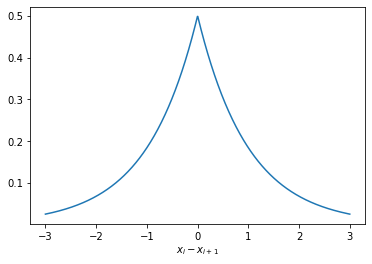

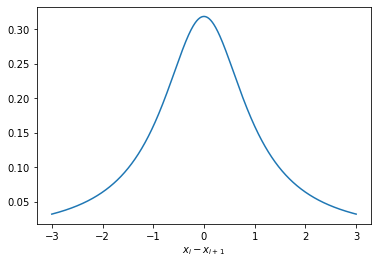

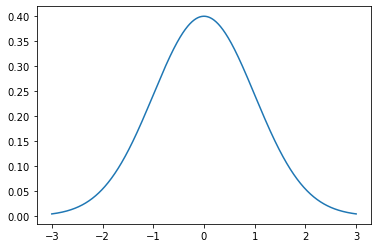

In [14]:

%matplotlib inline
#plt.rc('font', size=16) # controls default text sizes

x_i_diff = np.linspace(-3,3,1000)

prob_l = sps.laplace.pdf(x_i_diff)

prob_c = sps.cauchy.pdf(x_i_diff)

prob_g = sps.norm.pdf(x_i_diff)

prob_u = sps.uniform.pdf(x_i_diff)

plt.figure(0)
plt.plot(x_i_diff, prob_l)
plt.xlabel("$x_{i}-x_{i+1}$")
#plt.ylabel("Laplace pdf")
plt.savefig("Laplace1D", dpi = 350)

plt.figure(1)
plt.plot(x_i_diff, prob_c)
plt.xlabel("$x_{i}-x_{i+1}$")
#plt.ylabel("Cauchy pdf")
plt.savefig("Cauchy1D", dpi = 350)

plt.figure(2)
plt.plot(x_i_diff,prob_g)
#plt.xlabel("$x$")
#plt.ylabel("Gauss pdf")
plt.savefig("Gauss1D", dpi = 350)

# plt.figure(3)
# plt.plot(x_i_diff,prob_u)
# plt.xlabel("$x_{i}$")
# plt.ylabel("Uniform pdf")

 GMRF:

 Order 0: $x_i \sim \mathcal{N}(x_i, \delta^{-1})$

Order 1: :math:$x_i \mid x_{i-1},x_{i+1} \sim \mathcal{N}((x_{i-1}+x_{i+1})/2, (2\delta)^{-1}))$

Order 2: :math:$x_i \mid x_{i-1},x_{i+1} \sim \mathcal{N}((-x_{i-1}+2x_i-x_{i+1})/4, (4\delta)^{-1}))$

In general we can define the GMRF distribution on each point by


$x_i \mid \mathbf{x}_{\partial_i} \sim \mathcal{N}\left(\sum_{j \in \partial_i} \\beta_{ij} x_j, \kappa_i^{-1}\right)$

where $\\kappa_i$ is the precision of each Gaussian and $\\beta_{ij}$ are coefficients defining the structure of the GMRF

2D pdfs
 Cauchy
$\pi(\mathbf{x}) = \frac{1}{(\pi\gamma)^n \left( 1+\left( \frac{\mathbf{D}(\mathbf{x}-\mathbf{x}_0)}{\gamma} \right)^2 \right) }$

Laplace
$\pi(\mathbf{x}) = \frac{1}{(2b)^n}  \exp \left(- \frac{\|\mathbf{D}(\mathbf{x}-\mathbf{x}_0) \|_1 }{b} \right)$

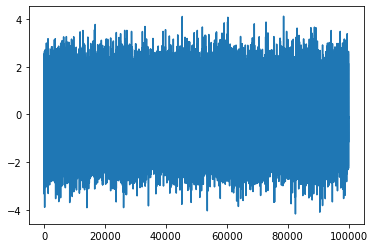

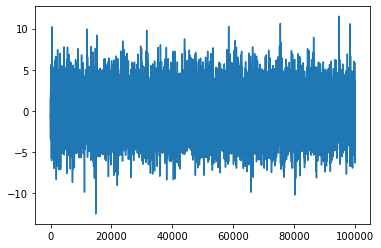

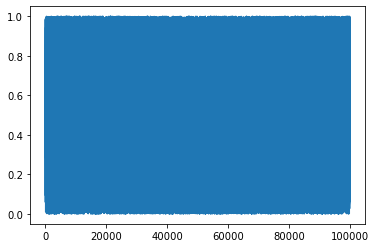

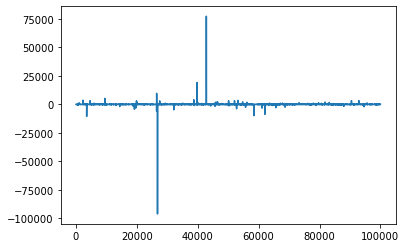

In [8]:

n = 100000
Ng = np.random.randn(n,1)
Nl = np.random.laplace(loc=0.0, scale=1.0, size=n)
Nu = np.random.uniform(low=0.0, high=1.0, size=n)
Nc = np.random.standard_cauchy(n)
plt.figure(0)
plt.plot(Ng)

plt.figure(1)
plt.plot(Nl)

plt.figure(2)
plt.plot(Nu)

plt.figure(3)
plt.plot(Nc)

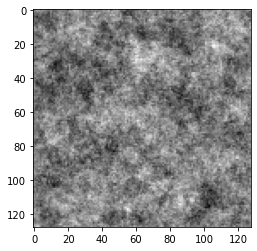

In [13]:
#GMRFG plots
import cuqi
n = 128*128
prior = cuqi.distribution.GMRF(np.zeros(n),1,order=1,physical_dim=2)
X = prior.sample().plot()
